<a href="https://colab.research.google.com/github/twalker47/helloAI/blob/main/Assignment5_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# based on https://www.sitepoint.com/keras-digit-recognition-tutorial/

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.datasets.mnist as kdm
from keras.utils import to_categorical

# tf.config.set_visible_devices([], 'GPU') # if you have an m1/m2 mac, uncomment this line to run wayyyy faster if you have local install of jupyter. leave commented if you are running on google colab 

(x_train, y_train), (x_test, y_test) = kdm.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print("before converting...", y_train[0])

# reshape
img_rows, img_cols = 28, 28
# normalize inputs to between 0 and 1
import numpy as np
x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(y_test[0])

# convert to vector outputs 
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("after converting y...", y_test[0])

model = keras.models.Sequential([
  layers.Flatten(input_shape=(28,28)),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=10,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

11490434/11490434 [==============================] - 0s 0us/step
before converting... 5
7
after converting y... [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
6000/6000 [==============================] - 31s 5ms/step - loss: 0.3236 - accuracy: 0.9125 - val_loss: 0.1888 - val_accuracy: 0.9456
Test loss: 0.18883033096790314
Test accuracy: 0.9455999732017517


In [2]:
def findTroublesomeImageKERAS(model, x_test):
  worsta = 1
  worsti = 0
  for i in range(len(x_test)):
    prediction = model.predict(x_test[i], verbose=False)
    max_a = np.max(prediction)
    if max_a < worsta:
      worsta = max_a
      worsti = i
  return (worsta, worsti)

In [3]:
print(score)
#print(x_test[768])
a = model.predict(x_test[768:769])
print(a)
print(y_test[768])
troublesome = findTroublesomeImageKERAS(model, x_test)
print(troublesome)



[0.18883033096790314, 0.9455999732017517]
1/1 [==============================] - 0s 204ms/step
[[8.9651600e-08 9.9586785e-01 2.4473184e-04 1.1204699e-03 3.8580488e-06
  1.4786571e-04 1.2511402e-04 7.6023265e-05 2.3612080e-03 5.2681022e-05]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


KeyboardInterrupt: ignored

1/1 [==============================] - 0s 44ms/step
[[2.4684091e-04 7.4938829e-03 4.9407510e-03 6.9346297e-01 1.1179765e-01
  6.0390864e-02 5.2906614e-02 3.5069812e-02 3.3331439e-02 3.5913292e-04]]


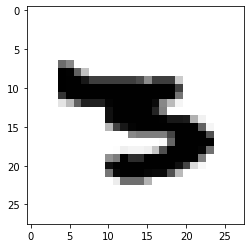

In [4]:
a = model.predict(x_test[2770])
print(a)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.reshape(x_test[2770], (28,28)),cmap="gray_r")

In [5]:
def dec_to_binvector4(dec):
  binstr = "{0:04b}".format(int(dec))
  binvect = []
  for b in binstr:
    binvect.append(int(b))
  return binvect

# expects y_data to be a list of nonnegative integer numbers (e.g., 0, 1, 2, 3)
# returns the binary representation of each y using the specified number of bits
def to_binary(y_data):
  return [np.array(dec_to_binvector4(y)).reshape(4, 1) for y in y_data]

print(dec_to_binvector4(7))

[0, 1, 1, 1]


In [6]:
# based on https://www.sitepoint.com/keras-digit-recognition-tutorial/

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.datasets.mnist as kdm
from keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = kdm.load_data()


# reshape
img_rows, img_cols = 28, 28
# normalize inputs to between 0 and 1
import numpy as np
x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# convert to vector outputs 
num_classes = 10
y_train = to_binary(y_train)
y_test = to_binary(y_test)

y_train = np.array(y_train).reshape(60000, 4)
y_test = np.array(y_test).reshape(10000, 4)

model = keras.models.Sequential([
  layers.Flatten(input_shape=(28,28)),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(10, activation='sigmoid'),
  layers.Dense(4, activation='sigmoid'),
])

model.compile(loss='mean_squared_error',
      optimizer='adam',
      metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=10,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/30
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0633 - accuracy: 0.5123 - val_loss: 0.0300 - val_accuracy: 0.5322
Epoch 2/30
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0228 - accuracy: 0.5741 - val_loss: 0.0202 - val_accuracy: 0.5554
Epoch 3/30
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0155 - accuracy: 0.6028 - val_loss: 0.0175 - val_accuracy: 0.6123
Epoch 4/30
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0122 - accuracy: 0.6169 - val_loss: 0.0139 - val_accuracy: 0.6192
Epoch 5/30
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0102 - accuracy: 0.6310 - val_loss: 0.0135 - val_accuracy: 0.6376
Epoch 6/30
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0086 - accuracy: 0.6316 - val_loss: 0.0127 - val_accuracy: 0.6413
Epoch 7/30
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0075 - accuracy: 0.6309 - val_loss: 0.0121 - val_ac